In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from statistics import mean
import math
#libraries for gamma correction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
low_img=cv2.imread('/content/drive/MyDrive/raw_images/zurich_000034_000019_leftImg8bit.png',-1)
bright_img=cv2.imread('/content/drive/MyDrive/raw_images/High_illumination/zurich_000034_000019_leftImg8bit.png',-1)

In [ ]:
#Gamma Correction refers to using a Gamma Factor in order to upscale the pixels of a dim image or downscale the pixels of a bright image
# https://www.researchgate.net/publication/214781523_Understanding_the_Gamma_Adjustment_of_Images - source
# Output_Image= Input_Image^(Gamma_Value)
#When inversed we get:
# Gamma_Value = log(Output_Image)/log(Input_Image)

In [ ]:
scale_low_img=low_img/255.0 #We scale the pixels of the dim image in the range of 0 to 1
scale_bright_img=bright_img/255.0 #We scale the pixels of the bright image in the range of 0 to 1
log_low_img=np.log(scale_low_img) #We apply log to each element of the scaled down dim image
log_bright_img=np.log(scale_bright_img) #We apply log to each element of the scaled down bright image

In [ ]:
gamma=(log_bright_img)/(log_low_img) #Dividing the logs to obtain a unit matrix multiplied by a factor of Gamma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
final_gamma=np.round_(gamma,decimals=2) #Rounding it up to 2 decimals to get the same value in all elements

In [ ]:
print(final_gamma)

[[[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]

 [[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]

 [[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]

 ...

 [[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]

 [[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]

 [[0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  ...
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]
  [0.67 0.67 0.67]]]


In [ ]:
gam=0.67
inv_gam=1/gam
print(inv_gam) #Taking Inverse of Gamma

1.4925373134328357


In [ ]:
import matplotlib

In [ ]:
#Gamma Uncorrection:
# Input_Image=(Output_Image)^(inv_gam)

In [ ]:
table = [((i / 255) ** inv_gam) * 255 for i in range(256)] #Using a LookUp Table where each element lies in range [0,255] and applying the gamma uncorrection formula
table = np.array(table, np.uint8)
og_image=cv2.LUT(bright_img, table) #Using cv2.LUT to use the table in each row of the array

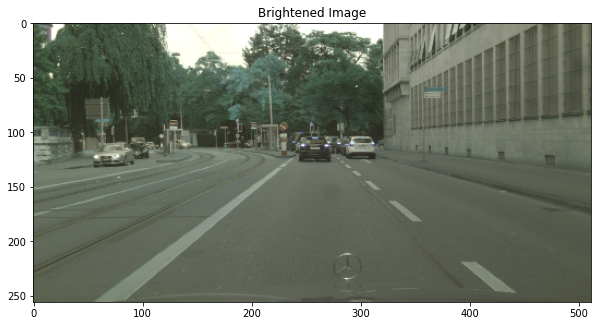

In [ ]:
plt.figure(figsize=[10,10])
plt.title("Brightened Image") #Given Brightened image
plt.imshow(bright_img)

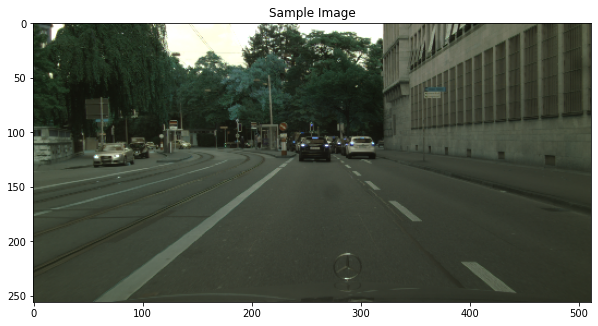

In [ ]:
plt.figure(figsize=[10,10])
plt.title("Sample Image") #Sample Dim Image
plt.imshow(low_img)

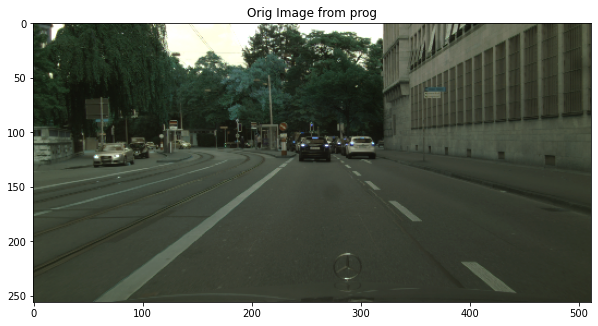

In [ ]:
plt.figure(figsize=[10,10])
plt.title("Orig Image from prog") #Converted Brightened to Dim image
plt.imshow(og_image)

In [ ]:
matplotlib.image.imsave('zurich_og.png', og_image)